|--- Income <= 59.60
|   |--- Lawn Size <= 21.40
|   |   |--- class: 0
|   |--- Lawn Size >  21.40
|   |   |--- class: 1
|--- Income >  59.60
|   |--- Lawn Size <= 19.80
|   |   |--- Income <= 84.75
|   |   |   |--- class: 0
|   |   |--- Income >  84.75
|   |   |   |--- class: 1
|   |--- Lawn Size >  19.80
|   |   |--- class: 1



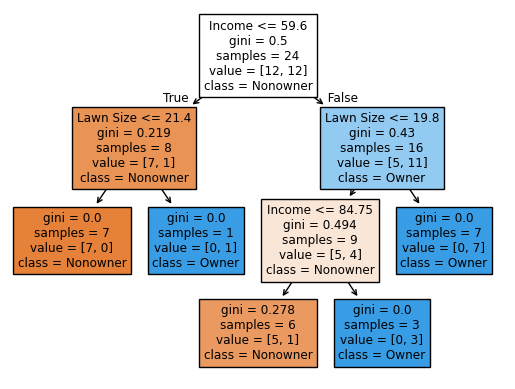

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

data = [
    [60, 18.4, 'Owner'], [75, 19.6, 'Nonowner'], [85.5, 16.8, 'Owner'], [52.8, 20.8, 'Nonowner'],
    [64.8, 21.6, 'Owner'], [64.8, 17.2, 'Nonowner'], [61.5, 20.8, 'Owner'], [43.2, 20.4, 'Nonowner'],
    [87, 23.6, 'Owner'], [84, 17.6, 'Nonowner'], [110.1, 19.2, 'Owner'], [49.2, 17.6, 'Nonowner'],
    [108, 17.6, 'Owner'], [59.2, 16, 'Nonowner'], [82.8, 22.4, 'Owner'], [66, 18.4, 'Nonowner'],
    [69, 20, 'Owner'], [47.4, 16.4, 'Nonowner'], [93, 20.8, 'Owner'], [33, 18.8, 'Nonowner'],
    [51, 22, 'Owner'], [51, 14, 'Nonowner'], [81, 20, 'Owner'], [63, 14.8, 'Nonowner']
]

X = [row[:2] for row in data]  
y = [row[2] for row in data]   

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Owner=1, Nonowner=0


clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X, y_encoded)

# Print tree rules
print(export_text(clf, feature_names=["Income", "Lawn Size"]))

# Visualize tree
plt.figure()
plot_tree(clf, feature_names=["Income", "Lawn Size"], class_names=le.classes_, filled=True)
plt.show()